<a href="https://colab.research.google.com/github/JamesBarciz/DS-Unit-1-Sprint-1-Dealing-With-Data/blob/master/James_Barciz_Sprint_Challenge_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science Unit 1 Sprint Challenge 1

## Loading, cleaning, visualizing, and analyzing data

In this sprint challenge you will look at a dataset of the survival of patients who underwent surgery for breast cancer.

http://archive.ics.uci.edu/ml/datasets/Haberman%27s+Survival

Data Set Information:
The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

Attribute Information:
1. Age of patient at time of operation (numerical)
2. Patient's year of operation (year - 1900, numerical)
3. Number of positive axillary nodes detected (numerical)
4. Survival status (class attribute)
-- 1 = the patient survived 5 years or longer
-- 2 = the patient died within 5 year

Sprint challenges are evaluated based on satisfactory completion of each part. It is suggested you work through it in order, getting each aspect reasonably working, before trying to deeply explore, iterate, or refine any given step. Once you get to the end, if you want to go back and improve things, go for it!

## Part 0 - Revert your version of Pandas right from the start
I don't want any of you to get stuck because of Pandas bugs, so right from the get-go revert back to version `0.23.4`
- Run the cell below
- Then restart your runtime. Go to `Runtime`  ->  `Restart runtime...` in the top menu (or click the "RESTART RUNTIME" button that shows up in the output of the cell below).


In [0]:
!pip install pandas==0.23.4

## Part 1 - Load and validate the data

- Load the data as a `pandas` data frame.
- Validate that it has the appropriate number of observations (you can check the raw file, and also read the dataset description from UCI).
- Validate that you have no missing values.
- Add informative names to the features.
- The survival variable is encoded as 1 for surviving >5 years and 2 for not - change this to be 0 for not surviving and 1 for surviving >5 years (0/1 is a more traditional encoding of binary variables)

At the end, print the first five rows of the dataset to demonstrate the above.

In [0]:
import pandas as pd

In [0]:
from google.colab import files

uploaded = files.upload()

Saving haberman.data to haberman (1).data


In [4]:
df = pd.read_csv('haberman.data')
df.head()

,30,64,1,1.1
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1


In [5]:
df.shape

(305, 4)

In [6]:
df.isnull().sum()

30     0
64     0
1      0
1.1    0
dtype: int64

In [7]:
column_headers = ['Age of Patient', 'Year of Operation (19xx)',
                  'Number of Positive Axillary Nodes Detected',
                  'Survival Status']

df = pd.read_csv('haberman.data', names=column_headers)
df.head()

,Age of Patient,Year of Operation (19xx),Number of Positive Axillary Nodes Detected,Survival Status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [8]:
df['Survival Status'].head(20)

0     1
1     1
2     1
3     1
4     1
5     1
6     1
7     2
8     2
9     1
10    1
11    1
12    1
13    1
14    1
15    1
16    1
17    1
18    1
19    1
Name: Survival Status, dtype: int64

In [0]:
# To test before I overwrite original data

#df3 = df.copy()         
#my_dict3 = {1:0, 2:1}
#df3['Survival Status'] = df3['Survival Status'].map(my_dict3)
#df3['Survival Status'].head(20)

In [10]:
my_dict = {1:0, 2:1}

df['Survival Status'] = df['Survival Status'].map(my_dict)
df['Survival Status'].head(20)

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     1
8     1
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
Name: Survival Status, dtype: int64

In [11]:
df.head()

,Age of Patient,Year of Operation (19xx),Number of Positive Axillary Nodes Detected,Survival Status
0,30,64,1,0
1,30,62,3,0
2,30,65,0,0
3,31,59,2,0
4,31,65,4,0


## Part 2 - Examine the distribution and relationships of the features

Explore the data - create at least *2* tables (can be summary statistics or crosstabulations) and *2* plots illustrating the nature of the data.

This is open-ended, so to remind - first *complete* this task as a baseline, then go on to the remaining sections, and *then* as time allows revisit and explore further.

Hint - you may need to bin some variables depending on your chosen tables/plots.

In [12]:
df.describe()

,Age of Patient,Year of Operation (19xx),Number of Positive Axillary Nodes Detected,Survival Status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,0.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,0.000000
25%,44.000000,60.000000,0.000000,0.000000
50%,52.000000,63.000000,1.000000,0.000000
75%,60.750000,65.750000,4.000000,1.000000
max,83.000000,69.000000,52.000000,1.000000


In [0]:
age_bins = pd.cut(df['Age of Patient'], 4, precision=0)
ax_nod_bin = pd.cut(df['Number of Positive Axillary Nodes Detected'], 2, precision=0)

In [14]:
pd.crosstab(df['Survival Status'], age_bins)

Age of Patient,"(30.0, 43.0]","(43.0, 56.0]","(56.0, 70.0]","(70.0, 83.0]"
Survival Status,,,,
0,60,84,66,15
1,13,40,22,6


In [0]:
# pd.crosstab(aux_nod_bin, df['Survival Status'])

# Most of the data is skewed to the first bin ∴ this may not be a good
# Way to look at the data

In [16]:
pd.crosstab(df['Year of Operation (19xx)'], df['Survival Status'], normalize='columns')

Survival Status,0,1
Year of Operation (19xx),,
58,0.106667,0.148148
59,0.080000,0.111111
60,0.106667,0.049383
61,0.102222,0.037037
62,0.071111,0.086420
63,0.097778,0.098765
64,0.102222,0.098765
65,0.066667,0.160494
66,0.097778,0.074074


In [17]:
pd.crosstab(df['Survival Status'], age_bins, normalize='columns')

Age of Patient,"(30.0, 43.0]","(43.0, 56.0]","(56.0, 70.0]","(70.0, 83.0]"
Survival Status,,,,
0,0.821918,0.677419,0.75,0.714286
1,0.178082,0.322581,0.25,0.285714


In [18]:
pd.crosstab(df['Survival Status'], df['Number of Positive Axillary Nodes Detected'])

Number of Positive Axillary Nodes Detected,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,28,30,35,46,52
Survival Status,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,117,33,15,13,10,2,4,5,5,2,2,1,1,1,3,1,1,0,1,1,1,0,2,0,0,1,1,1,0,1,0
1,19,8,5,7,3,4,3,2,2,4,1,3,1,4,1,2,0,1,0,2,1,1,1,3,1,0,0,0,1,0,1


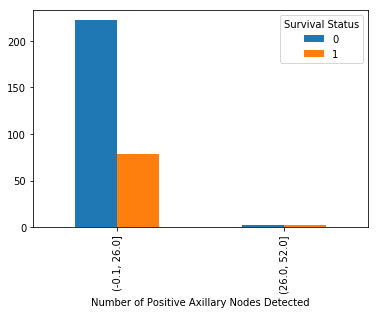

In [47]:
ct = pd.crosstab(ax_nod_bin, df['Survival Status'])
ct.plot(kind='bar');

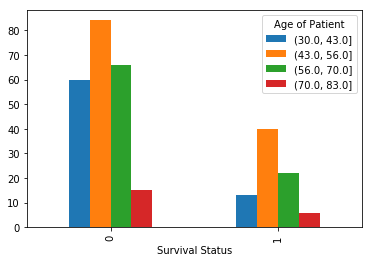

In [20]:
ct1 = pd.crosstab(df['Survival Status'], age_bins)
ct1.plot(kind='bar');

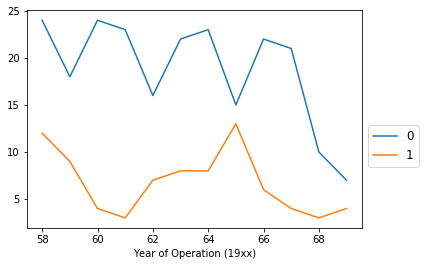

In [21]:
ct2 = pd.crosstab(df['Year of Operation (19xx)'], df['Survival Status'])
ct2.plot().legend(bbox_to_anchor=(1, 0.5), fontsize='large');

## Part 3 - DataFrame Filtering

Use DataFrame filtering to subset the data into two smaller dataframes. You should make one dataframe for individuals who survived >5 years and a second dataframe for individuals who did not. 

Create a graph with each of the dataframes (can be the same graph type) to show the differences in Age and Number of Positive Axillary Nodes Detected between the two groups.

In [0]:
# Precautionary action in case it did not work

#df2 = df.copy()

#df2['Survived > 5 Years'] = df2['Survival Status'].map({1:0, 0:1})
#df2['Survived <= 5 Years'] = df2['Survival Status'].map({1:1, 0:0})

In [0]:
# Added 2 additional columns based on Survival Status with binary values
# Where 1 = True, 0 = False
#df['Survived > 5 Years'] = df['Survival Status'].map({1:0, 0:1})
#df['Survived <= 5 Years'] = df['Survival Status'].map({1:1, 0:0})

In [0]:
#df.head(20)

In [0]:
#df1 = df.filter(['Age of Patient', 'Year of Operation (19xx)',
#                'Number of Positive Axillary Nodes Detected',
#                'Survived > 5 Years'])
#df2 = df.filter(['Age of Patient', 'Year of Operation (19xx)',
#                'Number of Positive Axillary Nodes Detected',
#                'Survived <= 5 Years'])

In [0]:
#df1.head()

In [0]:
#df2.head()

In [28]:
df.head()

,Age of Patient,Year of Operation (19xx),Number of Positive Axillary Nodes Detected,Survival Status
0,30,64,1,0
1,30,62,3,0
2,30,65,0,0
3,31,59,2,0
4,31,65,4,0


In [0]:
df1 = df.loc[df['Survival Status'] == 0]
df2 = df.loc[df['Survival Status'] == 1]

In [30]:
df1.head()

,Age of Patient,Year of Operation (19xx),Number of Positive Axillary Nodes Detected,Survival Status
0,30,64,1,0
1,30,62,3,0
2,30,65,0,0
3,31,59,2,0
4,31,65,4,0


In [31]:
df2.head()

,Age of Patient,Year of Operation (19xx),Number of Positive Axillary Nodes Detected,Survival Status
7,34,59,0,1
8,34,66,9,1
24,38,69,21,1
34,39,66,0,1
43,41,60,23,1


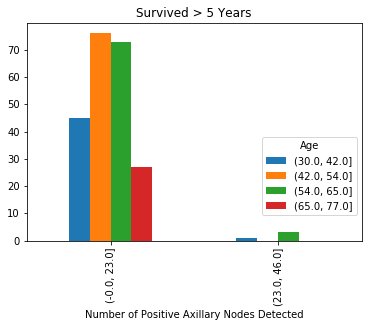

In [32]:
age_bin2 = pd.cut(df1['Age of Patient'], 4, precision=0)
nod_bin2 = pd.cut(df1['Number of Positive Axillary Nodes Detected'], 2, precision=0)

ct3 = pd.crosstab(nod_bin2, age_bin2)
ct3.plot(kind='bar', title='Survived > 5 Years').legend(bbox_to_anchor=(1, 0.5), title='Age');

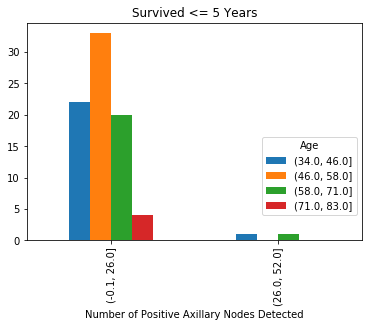

In [33]:
age_bin3 = pd.cut(df2['Age of Patient'], 4, precision=0)
nod_bin3 = pd.cut(df2['Number of Positive Axillary Nodes Detected'], 2, precision=0)

ct4 = pd.crosstab(nod_bin3, age_bin3)
ct4.plot(kind='bar', title='Survived <= 5 Years').legend(bbox_to_anchor=(1, 0.5), title='Age');

## Part 4 - Analysis and Interpretation

Now that you've looked at the data, answer the following questions:

- What is at least one feature that looks to have a positive relationship with survival? (As that feature goes up in value rate of survival increases)
- What is at least one feature that looks to have a negative relationship with survival? (As that feature goes down in value rate of survival increases)
- How are those two features related with each other, and what might that mean?

Answer with text, but feel free to intersperse example code/results or refer to it from earlier.

--1: There seems to be a relationship between the number of Positive Axillary Nodes Detected and Survival rate.  At 0 nodes, there are more patients who survived more than 5 years compared to those who had 1 or more axillary nodes.

--2: Looking at the crosstabulation between the Age of the patient and Survival Status it appears that the older a patient is, the less likely they are to survive more than 5 years.

--3: The relationship of positive nodes and age appears equivocal the age of the patients is more concentrated in the median of the values thus, it would be more difficult to hone onto a real relationship without an equal number of patients for each age.

In [48]:
pd.crosstab(df['Age of Patient'], ax_nod_bin)

Number of Positive Axillary Nodes Detected,"(-0.1, 26.0]","(26.0, 52.0]"
Age of Patient,,
30,3,0
31,2,0
33,2,0
34,6,1
35,2,0
36,2,0
37,6,0
38,10,0
39,6,0
